<font size=6><center>Optiver - Trading at the Close</center></font>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import BaggingRegressor
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = "retina"
plt.rcParams['font.sans-serif'] = ['SimSun', 'Arial']
plt.rcParams['axes.unicode_minus'] = False

### （〇）数据概览

In [2]:
df = pd.read_csv("./train.csv")

In [3]:
def show_info(df):
    msg = pd.DataFrame({
        "元素数量": len(df),
        "唯一性": df.nunique() == len(df),
        "不同元素数量": df.nunique(),
        "重复值数量": len(df) - df.nunique(),
        "缺失值数量": df.isnull().sum(),
        "缺失值比率": round(df.isnull().sum() / len(df) * 100, 4),
        "0值数量": (df == 0).sum(),
        "0值比率": round((df == 0).sum() / len(df) * 100, 4),
        "最大值": df.max(),
        "最小值": df.min(),
        "中位数": df.median(),
        "数值类型": df.dtypes
    })
    return msg

In [4]:
msg = show_info(df)
msg

,元素数量,唯一性,不同元素数量,重复值数量,缺失值数量,缺失值比率,0值数量,0值比率,最大值,最小值,中位数,数值类型
stock_id,5237980,False,200,5237780,0,0.0000,26455,0.5051,199,0,99.0,int64
date_id,5237980,False,481,5237499,0,0.0000,10505,0.2006,480,0,242.0,int64
seconds_in_bucket,5237980,False,55,5237925,0,0.0000,95236,1.8182,540,0,270.0,int64
imbalance_size,5237980,False,2971863,2266117,220,0.0042,1131443,21.6008,2982027811.68,0.0,1113604.44,float64
imbalance_buy_sell_flag,5237980,False,3,5237977,0,0.0000,1131594,21.6036,1,-1,0.0,int64
reference_price,5237980,False,28741,5209239,220,0.0042,0,0.0000,1.077488,0.935285,0.999967,float64
matched_size,5237980,False,2948862,2289118,220,0.0042,0,0.0000,7713682054.05,4316.61,12882638.56,float64
far_price,5237980,False,95739,5142241,2894342,55.2568,0,0.0000,437.9531,0.000077,0.999883,float64
near_price,5237980,False,84625,5153355,2857180,54.5474,0,0.0000,1.309732,0.786988,0.999889,float64
bid_price,5237980,False,28313,5209667,220,0.0042,0,0.0000,1.077488,0.934915,0.999728,float64


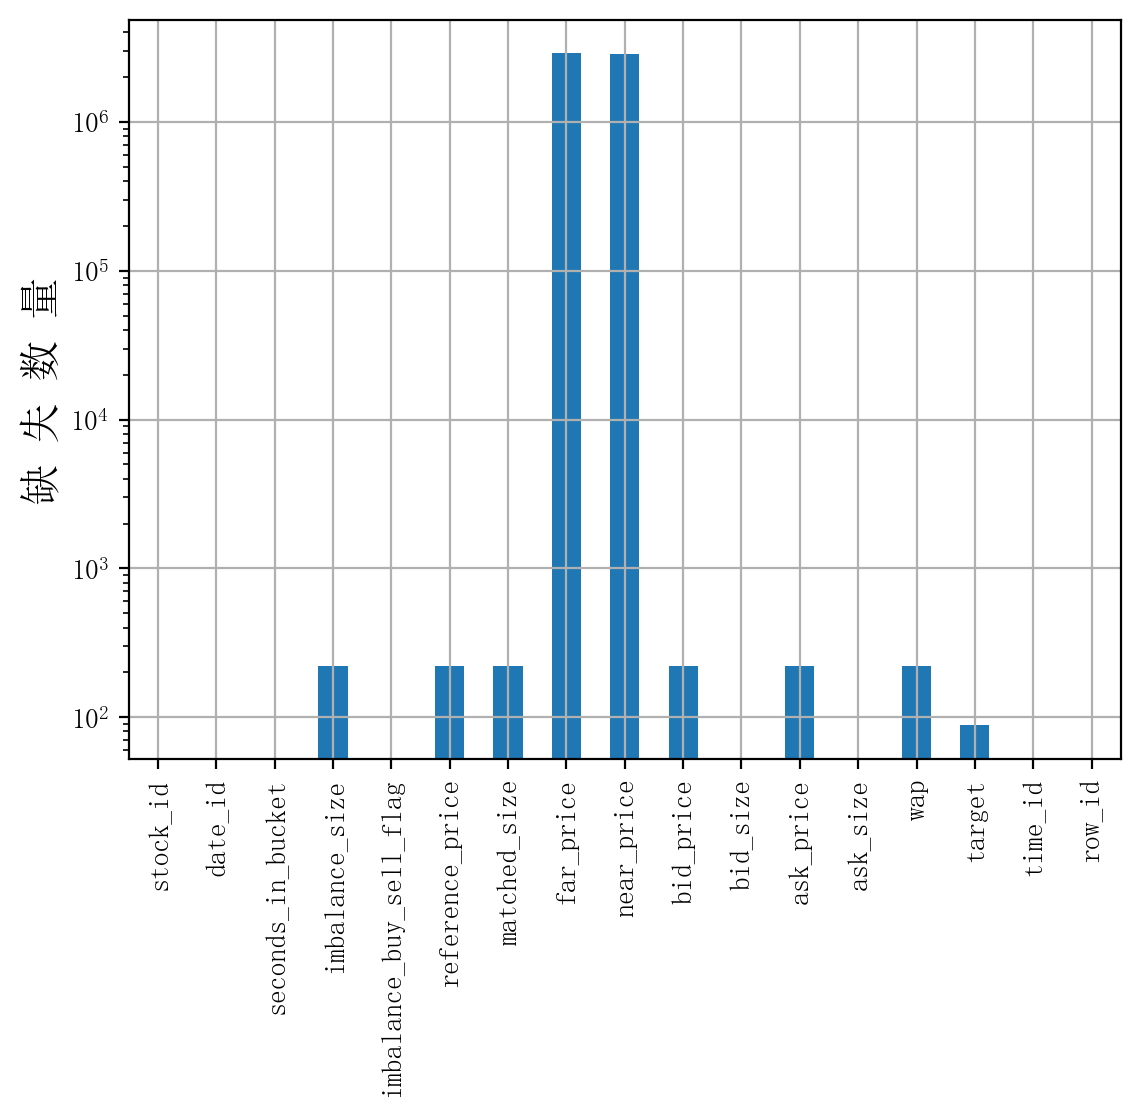

In [5]:
msg["缺失值数量"].plot(kind="bar", logy=True)
plt.grid()
plt.ylabel("缺 失 数 量", fontsize=15)
plt.show()

可以看到target缺失数量较少，imbalance_size，reference_price，matched_size，bid_price，ask_price，wap有类似水平的缺失; 而far_price和near_price的缺失值较多

### （一）首先分析缺失数量最少的target变量

In [6]:
df_nan_target = df.query("target.isnull()")
df_nan_target

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
369508,131,35,0,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1925,35_0_131
369700,131,35,10,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1926,35_10_131
369892,131,35,20,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1927,35_20_131
370084,131,35,30,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1928,35_30_131
370276,131,35,40,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1929,35_40_131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4225338,158,388,510,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21391,388_510_158
4225538,158,388,520,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21392,388_520_158
4225738,158,388,530,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21393,388_530_158
4225938,158,388,540,NaN,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,21394,388_540_158


In [7]:
# 将stock_id和date_id合并构造新属性，然后分析有多少个不同的(stock_id, date_id)组合
df_nan_target["stock_id_date_id"] = df_nan_target["stock_id"].astype(str) + "_" + df_nan_target["date_id"].astype(str)
df_nan_target.groupby("stock_id_date_id")["stock_id"].count()

stock_id_date_id
101_328     1
131_35     31
158_388    55
19_438      1
Name: stock_id, dtype: int64

可见缺失值出现在(101, 328), (131, 35), (158, 388), (19, 438)四只股票的四个时段，并且每组的缺失情况各不相同

### （二）其次为缺失数量相差不大的imbalance_size，reference_price，matched_size，bid_price，ask_price，wap

In [8]:
msg.loc["imbalance_size", "缺失值数量"] == msg.loc["reference_price", "缺失值数量"] == msg.loc["matched_size", "缺失值数量"]\
    == msg.loc["bid_price", "缺失值数量"] == msg.loc["ask_price", "缺失值数量"] == msg.loc["wap", "缺失值数量"]

True

既然缺失数量相同，接下来判断imbalance_size，reference_price，matched_size，bid_price，ask_price，wap是否同时缺失<br>
具体方法是，选取其中一个变量的缺失数据，判断其他变量的缺失数量是否等于这个缺失数量，如果相等，说明是同时缺失的

In [9]:
df_nan = df.query("imbalance_size.isnull()")
df_nan[["imbalance_size", "reference_price", "matched_size", "bid_price", "ask_price", "wap"]].isnull().sum() == msg.loc["imbalance_size", "缺失值数量"]

imbalance_size     True
reference_price    True
matched_size       True
bid_price          True
ask_price          True
wap                True
dtype: bool

结果表明缺失值是同时产生的，接下来就要分析是何时产生的

In [10]:
# 将stock_id和date_id合并构造新属性，然后分析有多少个不同的(stock_id, date_id)组合
df_nan["stock_id_date_id"] = df_nan["stock_id"].astype(str) + "_" + df_nan["date_id"].astype(str)

In [11]:
df_nan.groupby("stock_id_date_id")["stock_id"].count()

stock_id_date_id
101_328    55
131_35     55
158_388    55
19_438     55
Name: stock_id, dtype: int64

可见缺失值出现在(101, 328), (131, 35), (158, 388), (19, 438)四只股票的四个时段，每个时段均缺失55条数据<br>
缺失的情况与target变量相同，可见四只股票分别在四个时段没有任何imbalance_size等数据，同时缺失部分target数据

### （三）最后分析缺失最多的far_price和near_price

In [12]:
msg.loc["far_price", "缺失值数量"] == msg.loc["near_price", "缺失值数量"]

False

由于数量不同，可见far_price和near_price并不是同时缺失的

In [13]:
df_nan_far = df.query("far_price.isnull()")
df_nan_near = df.query("near_price.isnull()")

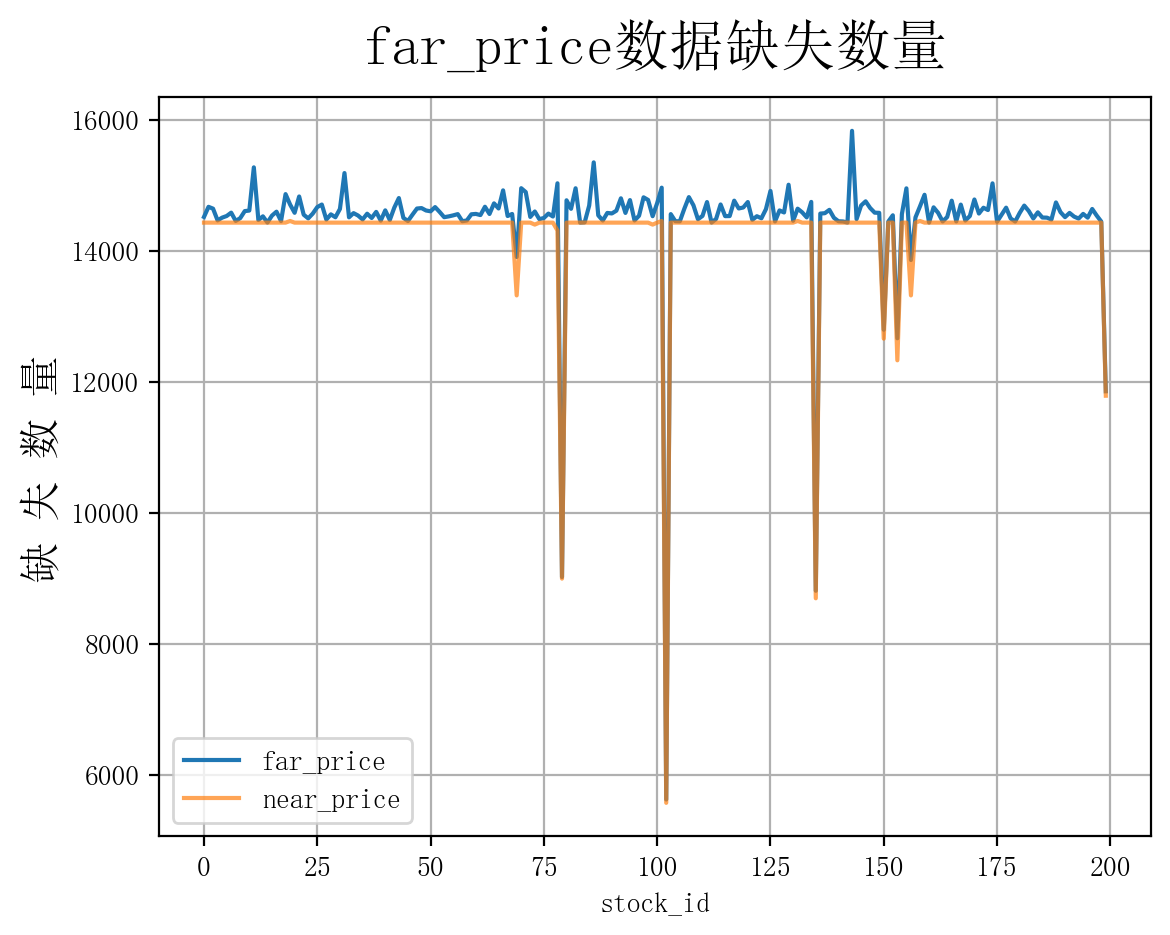

In [14]:
df_nan_far.groupby("stock_id").count()["date_id"].plot()
df_nan_near.groupby("stock_id").count()["date_id"].plot(alpha=0.7)
plt.title("far_price数据缺失数量", fontsize=20, y=1.02)
plt.ylabel("缺 失 数 量", fontsize=15)
plt.grid()
plt.legend(["far_price", "near_price"])
plt.show()

可见二者具有高度的相关性，不过near_price的整体缺失数量相对far_pairce少一些

In [15]:
df_far_group = df_nan_far.groupby("stock_id").count()["date_id"]
df_far_group[df_far_group < 14000]

stock_id
69     13906
79      9025
102     5631
135     8815
150    12796
153    12666
156    13860
199    11858
Name: date_id, dtype: int64

In [16]:
df_near_group = df_nan_far.groupby("stock_id").count()["date_id"]
df_near_group[df_near_group < 14000]

stock_id
69     13906
79      9025
102     5631
135     8815
150    12796
153    12666
156    13860
199    11858
Name: date_id, dtype: int64

In [17]:
(df_far_group[df_far_group < 14000] == df_near_group[df_near_group < 14000]).all()

True

可见far_price和near_price在缺失数少于14000条的股票是相同的

### （四）分析wap取值

#### 4.1 固定bid_size，改变ask_size

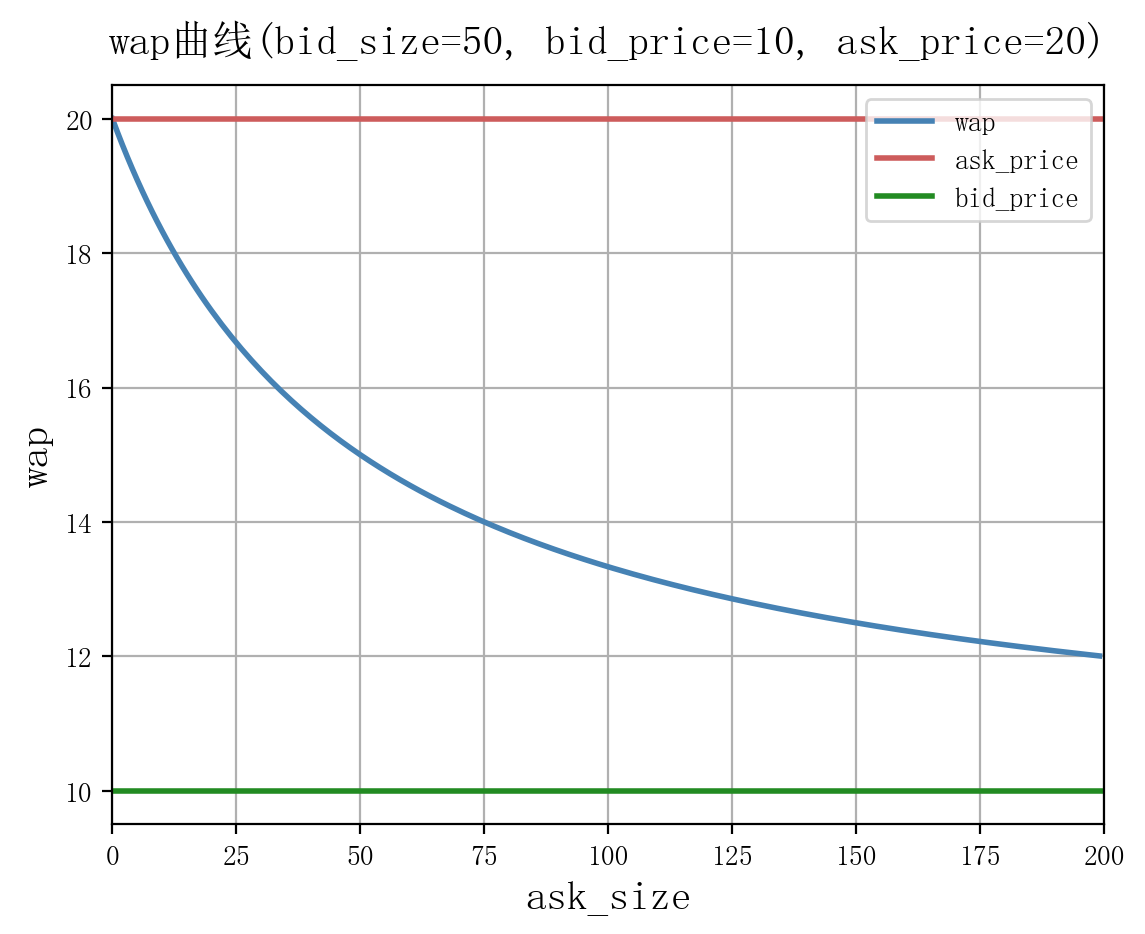

In [18]:
bid_size = 50
ask_size = np.arange(0, 200, 1)
bid_price = 10
ask_price = 20
plt.plot(range(len(ask_size)), (bid_price * ask_size + ask_price * bid_size) / (bid_size + ask_size), color="steelblue", label="wap", linewidth=2)
plt.axhline(y=ask_price, label="ask_price", color="indianred", linewidth=2)
plt.axhline(y=bid_price, label="bid_price", color="forestgreen", linewidth=2)
plt.xlim(0, 200)
plt.xlabel("ask_size", fontsize=15)
plt.ylabel("wap", fontsize=15)
plt.title(f"wap曲线(bid_size={bid_size}, bid_price={bid_price}, ask_price={ask_price})", fontsize=15, y=1.02)
plt.legend(loc="upper right")
plt.grid()
plt.show()

#### 4.1 固定ask_size，改变bid_size

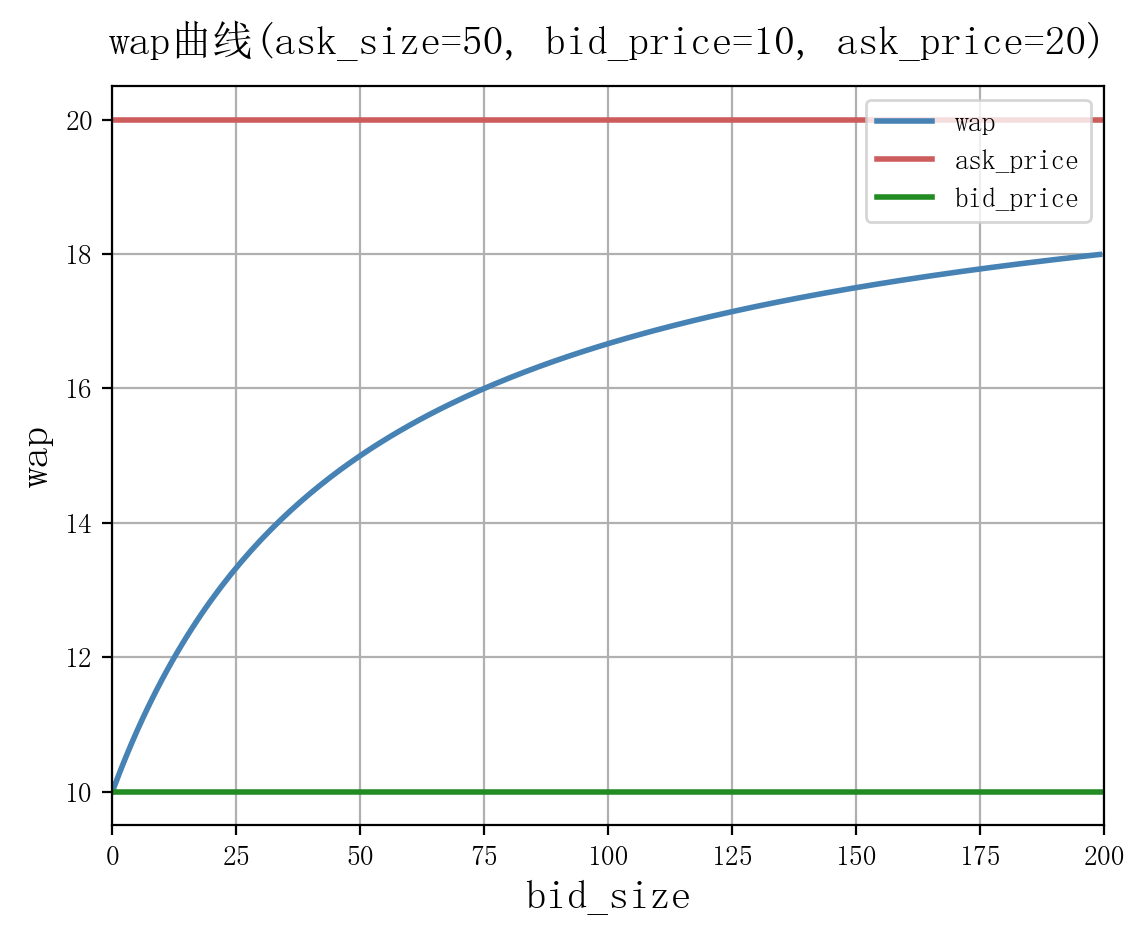

In [19]:
ask_size = 50
bid_size = np.arange(0, 200, 1)
bid_price = 10
ask_price = 20
plt.plot(range(len(bid_size)), (bid_price * ask_size + ask_price * bid_size) / (bid_size + ask_size), color="steelblue", label="wap", linewidth=2)
plt.axhline(y=ask_price, label="ask_price", color="indianred", linewidth=2)
plt.axhline(y=bid_price, label="bid_price", color="forestgreen", linewidth=2)
plt.xlim(0, 200)
plt.xlabel("bid_size", fontsize=15)
plt.ylabel("wap", fontsize=15)
plt.title(f"wap曲线(ask_size={ask_size}, bid_price={bid_price}, ask_price={ask_price})", fontsize=15, y=1.02)
plt.legend(loc="upper right")
plt.grid()
plt.show()

非竞价簿总是立刻结算成交，由于有AskPrice ≥ BidPrice，所以恒有BidPrice ≤ wap ≤ AskPrice<br>
当AskSize更大，则wap更接近BidPrice，反之若BidSize更大，则wap更接近AskPrice

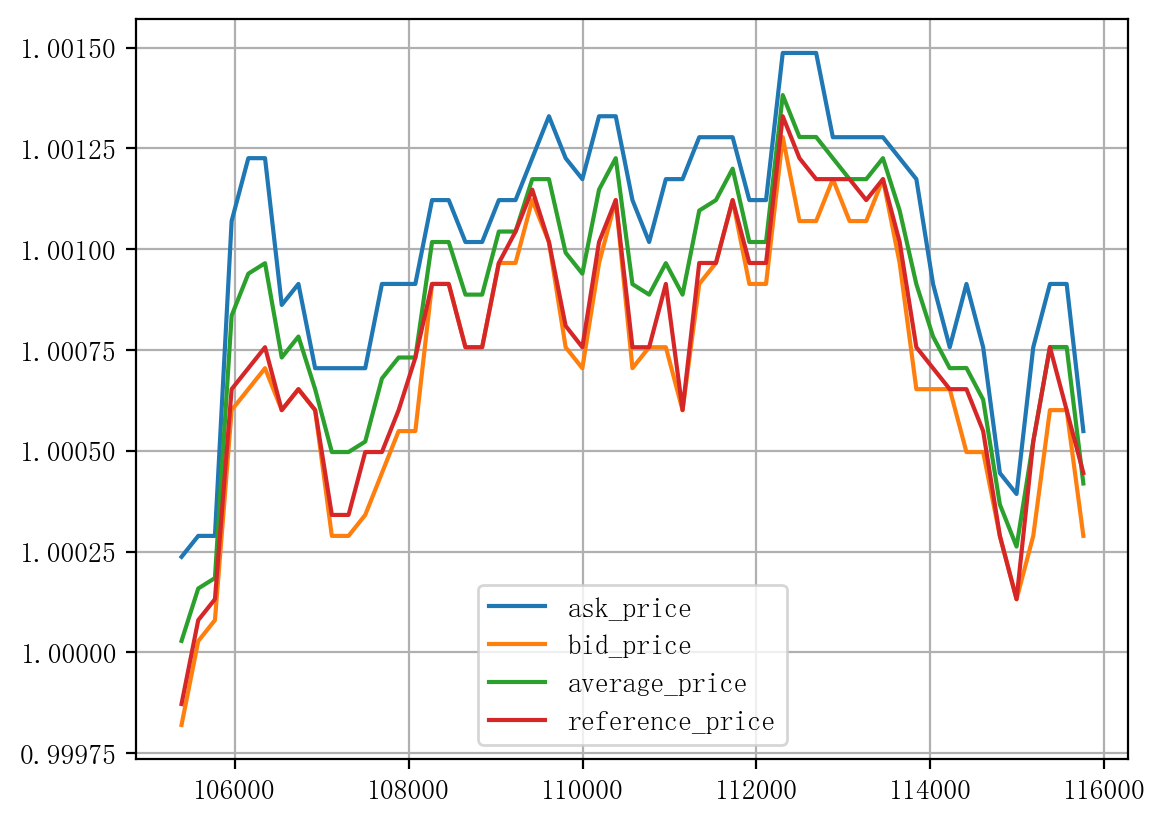

In [20]:
stock_id = 10
date_id = 10
df_tmp = df.query(f"stock_id=={stock_id} and date_id=={date_id}")
df_tmp["ask_price"].plot()
df_tmp["bid_price"].plot()
((df_tmp["bid_price"]+df_tmp["ask_price"])/2).plot()
# df_tmp["wap"].plot()
# df_tmp["near_price"].plot()
# df_tmp["far_price"].plot()
df_tmp["reference_price"].plot()
plt.legend(["ask_price", "bid_price", "average_price", "reference_price"])
plt.grid()
plt.show()

reference price: 最大化配对的股票数量、最小化市场失衡 <br>
mid_price = (bid_price + ask_price) / 2 <br>
选择距离mid_price最近的候选价格reference_price <br>
限定bid_price ≤ reference_price ≤ ask_price <br>

### （五）建模预测

In [21]:
x = df.query("target.notna()").drop(['row_id', "time_id", "target"], axis=1)
y = df.query("target.notna()")["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [25]:
# 线性回归
estimator_lin = LinearRegression()
estimator_lin.fit(x_train.fillna(method="bfill").fillna(method="ffill"), y_train)
y_pred_lin = estimator_lin.predict(x_test.fillna(method="bfill").fillna(method="ffill"))
mean_absolute_error(y_pred_lin, y_test)

6.32270969714314

In [24]:
# 决策树
estimator_tree = DecisionTreeRegressor()
estimator_tree.fit(x_train, y_train)
y_pred_tree = estimator_tree.predict(x_test)
mean_absolute_error(y_pred_tree, y_test)

6.36650824080565

In [25]:
# GDBT
estimator_boosting = HistGradientBoostingRegressor()
estimator_boosting.fit(x_train, y_train)
y_pred_boosting = estimator_boosting.predict(x_test)
mean_absolute_error(y_pred_boosting, y_test)

6.308433908689444

In [48]:
# Bagging
estimator_bagging = BaggingRegressor()
estimator_bagging.fit(x_train[::100], y_train[::100])
y_pred_bagging = estimator_bagging.predict(x_test[::100])
mean_absolute_error(y_pred_bagging, y_test[::100])

6.329701657940413

In [32]:
# 随机森林
estimator_RF = RandomForestRegressor()
estimator_RF.fit(x_train.fillna(method="bfill").fillna(method="ffill")[::100], y_train[::100])
y_pred_RF = estimator_RF.predict(x_test.fillna(method="bfill").fillna(method="ffill")[::100])
mean_absolute_error(y_pred_RF, y_test[::100])

6.388798775860266

In [33]:
# 支持向量机（训练效率低, 如果设置max_iter=10000，误差达到90.14918305112202）
estimator_SVR = SVR(C=1.0, kernel='rbf', degree=3, gamma='scale')
estimator_SVR.fit(x_train.fillna(method="bfill").fillna(method="ffill")[::100], y_train[::100])
y_pred_SVR = estimator_SVR.predict(x_test.fillna(method="bfill").fillna(method="ffill")[::100])
mean_absolute_error(y_pred_SVR, y_test[::100])

6.3583742817474995

#### 直接输出0作为预测结果

In [27]:
mean_absolute_error([0 for i in range(len(y_test))], y_test)

6.410632147026728

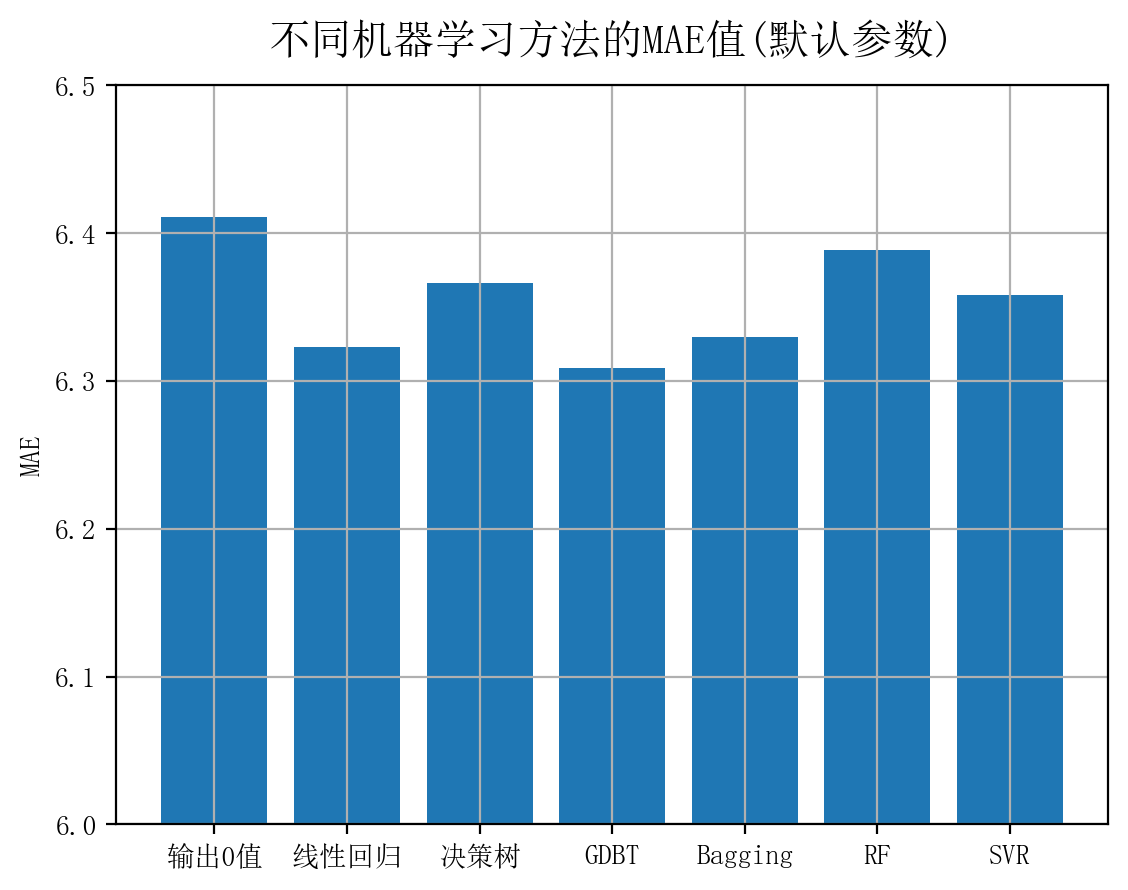

In [31]:
plt.bar(range(1, 7), [mean_absolute_error([0 for i in range(len(y_test))], y_test), mean_absolute_error(y_pred_lin, y_test),
        mean_absolute_error(y_pred_tree, y_test), mean_absolute_error(y_pred_boosting, y_test),
        mean_absolute_error(y_pred_bagging, y_test[::100]), mean_absolute_error(y_pred_RF, y_test[::100]),
        mean_absolute_error(y_pred_SVR, y_test[::100])])
plt.xticks(range(1, 7), ["输出0值", "线性回归", "决策树", "GDBT", "Bagging", "RF", "SVR"])
plt.ylim([6, 6.5])
plt.title("不同机器学习方法的MAE值(默认参数)", fontsize=15, y=1.02)
plt.ylabel("MAE")
plt.grid()
plt.show()